In [ ]:
# Import packages to visualize the classifer
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
# Import packages to do the classifying
from sklearn import metrics
import numpy as np
from sklearn.svm import SVC

**Function for plotting the decision boundary**

In [ ]:
def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

**Creating the Dataset**

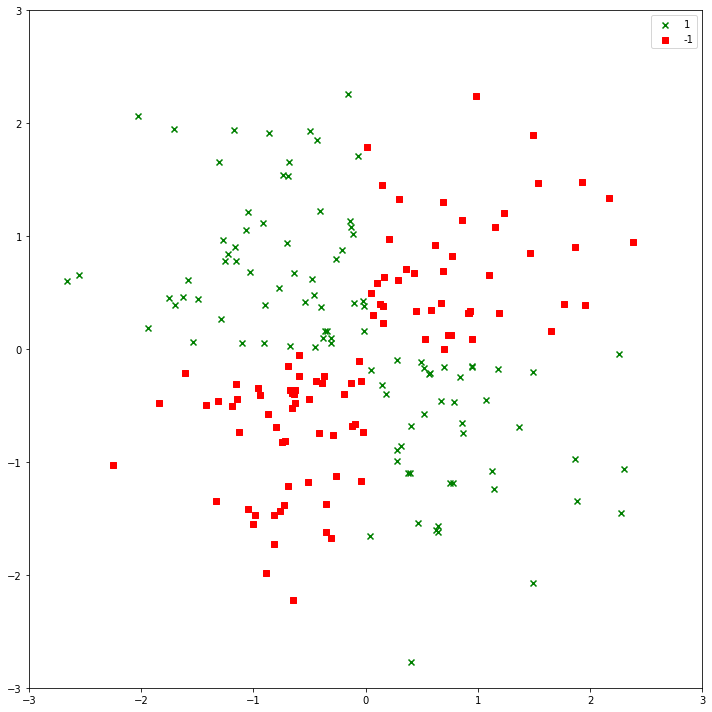

In [ ]:
# Create Dataset
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

fig = plt.figure(figsize=(10,10))
plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='g', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
X_xor

array([[ 1.76405235,  0.40015721],
       [ 0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ],
       [ 0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502],
       [ 0.44386323,  0.33367433],
       [ 1.49407907, -0.20515826],
       [ 0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ],
       [ 0.8644362 , -0.74216502],
       [ 2.26975462, -1.45436567],
       [ 0.04575852, -0.18718385],
       [ 1.53277921,  1.46935877],
       [ 0.15494743,  0.37816252],
       [-0.88778575, -1.98079647],
       [-0.34791215,  0.15634897],
       [ 1.23029068,  1.20237985],
       [-0.38732682, -0.30230275],
       [-1.04855297, -1.42001794],
       [-1.70627019,  1.9507754 ],
       [-0.50965218, -0.4380743 ],
       [-1.25279536,  0.77749036],
       [-1.61389785, -0.21274028],
       [-0.89546656,  0.3869025 ],
       [-0.51080514, -1.18063218],
       [-0.02818223,  0.42833187],
       [ 0.06651722,

In [ ]:
y_xor

array([-1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
        1, -1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1,  1,
        1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1,  1,
        1,  1, -1, -1, -1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1, -1,
       -1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1, -1, -1,
        1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1,  1,
       -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,
       -1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1, -1,  1,  1, -1,  1,
       -1,  1,  1, -1,  1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1, -1, -1,  1, -1, -1,  1, -1, -1,  1, -1, -1,  1, -1, -1,  1,  1,
       -1,  1,  1,  1, -1,  1, -1, -1,  1, -1, -1, -1, -1])

***Splitting into train and test*** 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_xor,y_xor, train_size=0.7,test_size=0.3,random_state=100)

## **Linear Kernel**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


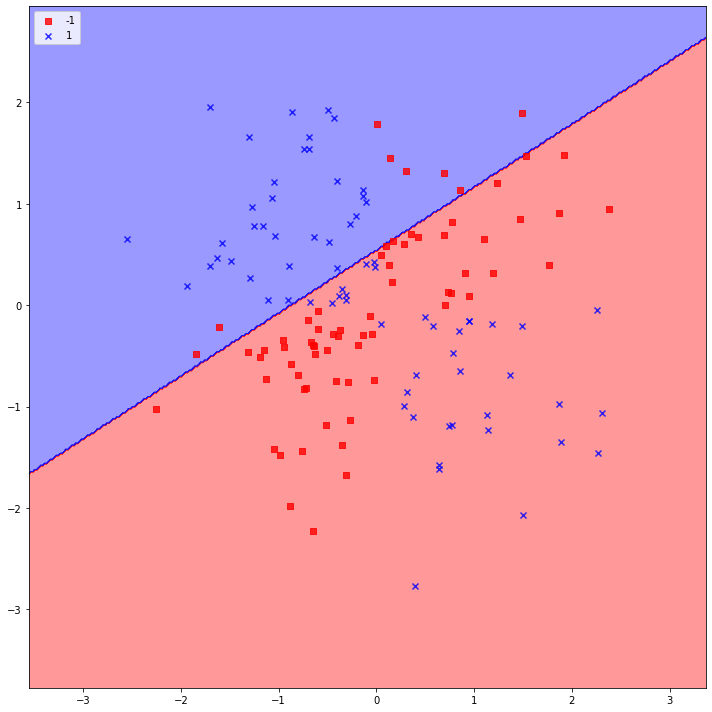

In [ ]:
# Create a SVC classifier using a linear kernel
svm = SVC(kernel='linear', C=1000, random_state=0)
# Train the classifier

svm.fit(X_train, y_train)

# Visualize the decision boundaries
fig = plt.figure(figsize=(10,10))
plot_decision_regions(X_train, y_train, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

**Scores for Linear Kernel**

In [ ]:

print("Train Accuracy is:")
predictedtrain = svm.predict(X_train)
print(svm.score(X_train,y_train))
print("Test Accuracy is:")
predicted = svm.predict(X_test)
print(svm.score(X_test,y_test))

Train Accuracy is:
0.6785714285714286
Test Accuracy is:
0.6833333333333333


In [ ]:
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[27  2]
 [17 14]]
              precision    recall  f1-score   support

          -1       0.61      0.93      0.74        29
           1       0.88      0.45      0.60        31

    accuracy                           0.68        60
   macro avg       0.74      0.69      0.67        60
weighted avg       0.75      0.68      0.67        60



# **Polynomial Kernel**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


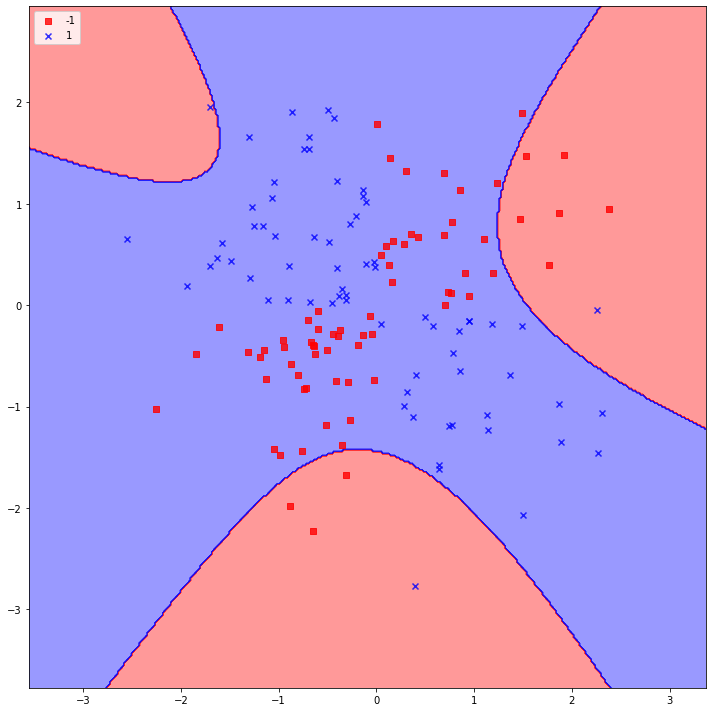

In [ ]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel= 'poly', random_state=0, gamma=1, C=1)
# Train the classifier
svm.fit(X_train, y_train)

# Visualize the decision boundaries
fig = plt.figure(figsize=(10,10))
plot_decision_regions(X_train, y_train, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
print("Train Accuracy is:")
predictedtrain = svm.predict(X_train)
print(svm.score(X_train,y_train))
print("Test Accuracy is:")
predicted = svm.predict(X_test)
print(svm.score(X_test,y_test))

Train Accuracy is:
0.5428571428571428
Test Accuracy is:
0.5666666666666667


In [ ]:
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[ 5 24]
 [ 2 29]]
              precision    recall  f1-score   support

          -1       0.71      0.17      0.28        29
           1       0.55      0.94      0.69        31

    accuracy                           0.57        60
   macro avg       0.63      0.55      0.48        60
weighted avg       0.63      0.57      0.49        60



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


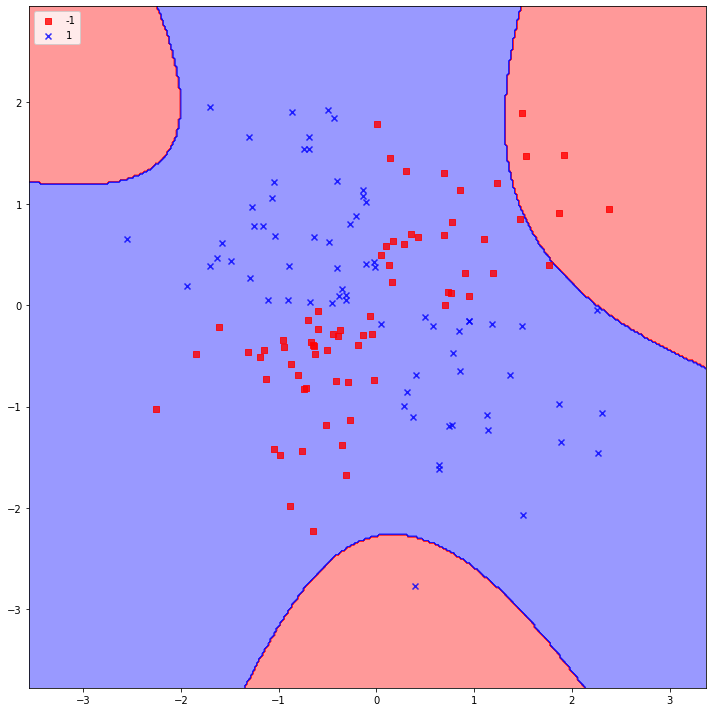

In [ ]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel= 'poly', random_state=0, gamma=1/10000, C=1)
# Train the classifier
svm.fit(X_train, y_train)

# Visualize the decision boundaries
fig = plt.figure(figsize=(10,10))
plot_decision_regions(X_train, y_train, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
print("Train Accuracy is:")
predictedtrain = svm.predict(X_train)
print(svm.score(X_train,y_train))
print("Test Accuracy is:")
predicted = svm.predict(X_test)
print(svm.score(X_test,y_test))

Train Accuracy is:
0.5285714285714286
Test Accuracy is:
0.5333333333333333


In [ ]:
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[ 2 27]
 [ 1 30]]
              precision    recall  f1-score   support

          -1       0.67      0.07      0.12        29
           1       0.53      0.97      0.68        31

    accuracy                           0.53        60
   macro avg       0.60      0.52      0.40        60
weighted avg       0.59      0.53      0.41        60



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


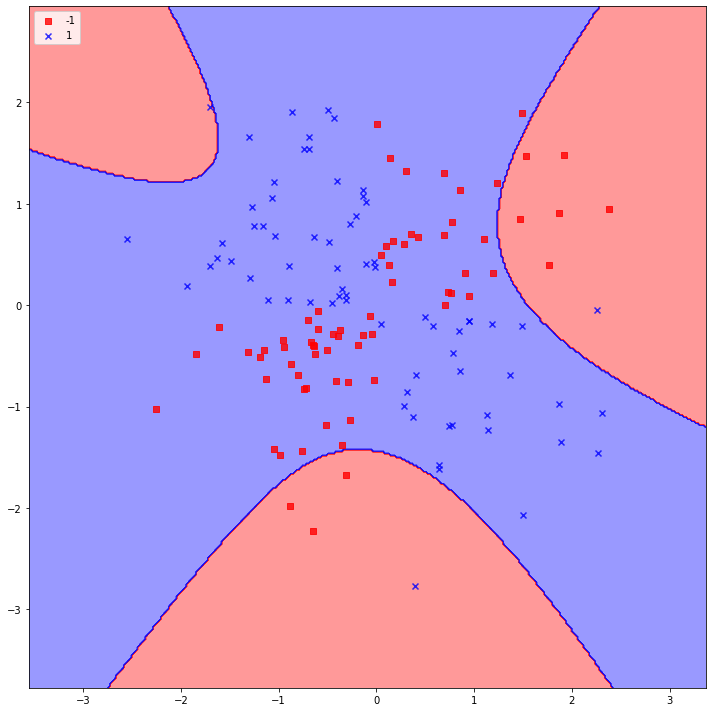

In [ ]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel= 'poly', random_state=0, gamma=0.01, C=1000000000)
# Train the classifier
svm.fit(X_train, y_train)

# Visualize the decision boundaries
fig = plt.figure(figsize=(10,10))
plot_decision_regions(X_train, y_train, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
print("Train Accuracy is:")
predictedtrain = svm.predict(X_train)
print(svm.score(X_train,y_train))
print("Test Accuracy is:")
predicted = svm.predict(X_test)
print(svm.score(X_test,y_test))

Train Accuracy is:
0.5428571428571428
Test Accuracy is:
0.5666666666666667


In [ ]:
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[ 5 24]
 [ 2 29]]
              precision    recall  f1-score   support

          -1       0.71      0.17      0.28        29
           1       0.55      0.94      0.69        31

    accuracy                           0.57        60
   macro avg       0.63      0.55      0.48        60
weighted avg       0.63      0.57      0.49        60



In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

**Grid Search **

In [ ]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 10, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000,5000,10000]}]


# specify model
model = SVC(kernel="poly")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.4s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=4, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000, 5000, 10000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [ ]:
model_cv.best_params_

{'C': 10000, 'gamma': 0.01}

In [ ]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel= 'poly', random_state=0, gamma=0.01, C=1)
# Train the classifier
svm.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='poly',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
print("Train Accuracy is:")
predictedtrain = svm.predict(X_train)
print(svm.score(X_train,y_train))
print("Test Accuracy is:")
predicted = svm.predict(X_test)
print(svm.score(X_test,y_test))

Train Accuracy is:
0.5285714285714286
Test Accuracy is:
0.5333333333333333


## **Sigmoid Kernel**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


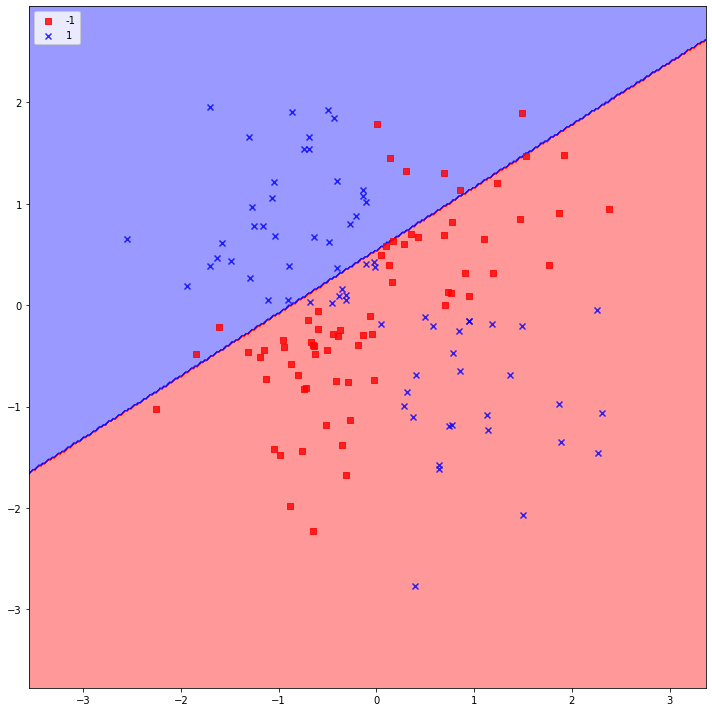

In [ ]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel= 'sigmoid', random_state=0, gamma=0.001, C=10000)
# Train the classifier
svm.fit(X_train, y_train)

# Visualize the decision boundaries
fig = plt.figure(figsize=(10,10))
plot_decision_regions(X_train, y_train, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
#plot_decision_regions(X_test, y_test, classifier=svm)
#plt.legend(loc='upper left')
#plt.tight_layout()
#plt.show()

In [ ]:
print("Train Accuracy is:")
predictedtrain = svm.predict(X_train)
print(svm.score(X_train,y_train))
print("Test Accuracy is:")
predicted = svm.predict(X_test)
print(svm.score(X_test,y_test))

Train Accuracy is:
0.6785714285714286
Test Accuracy is:
0.6833333333333333


In [ ]:
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[27  2]
 [17 14]]
              precision    recall  f1-score   support

          -1       0.61      0.93      0.74        29
           1       0.88      0.45      0.60        31

    accuracy                           0.68        60
   macro avg       0.74      0.69      0.67        60
weighted avg       0.75      0.68      0.67        60



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


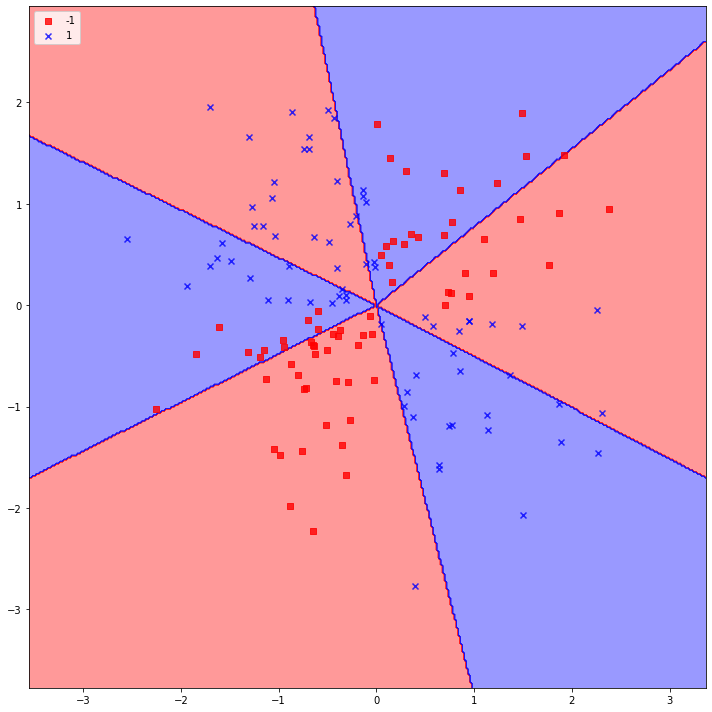

In [ ]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel= 'sigmoid', random_state=0, gamma=100000, C=1)
# Train the classifier
svm.fit(X_train, y_train)

# Visualize the decision boundaries
fig = plt.figure(figsize=(10,10))
plot_decision_regions(X_train, y_train, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
print("Train Accuracy is:")
predictedtrain = svm.predict(X_train)
print(svm.score(X_train,y_train))
print("Test Accuracy is:")
predicted = svm.predict(X_test)
print(svm.score(X_test,y_test))

Train Accuracy is:
0.5642857142857143
Test Accuracy is:
0.6166666666666667


In [ ]:
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[21  8]
 [15 16]]
              precision    recall  f1-score   support

          -1       0.58      0.72      0.65        29
           1       0.67      0.52      0.58        31

    accuracy                           0.62        60
   macro avg       0.62      0.62      0.61        60
weighted avg       0.63      0.62      0.61        60



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


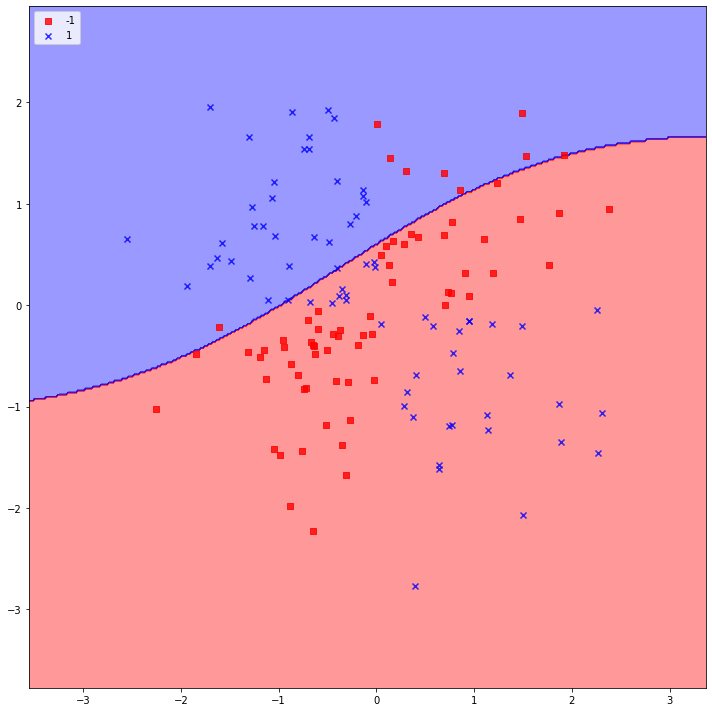

In [ ]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel= 'sigmoid', random_state=0, gamma=0.01, C=1000)
# Train the classifier
svm.fit(X_train, y_train)

# Visualize the decision boundaries
fig = plt.figure(figsize=(10,10))
plot_decision_regions(X_train, y_train, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
print("Train Accuracy is:")
predictedtrain = svm.predict(X_train)
print(svm.score(X_train,y_train))
print("Test Accuracy is:")
predicted = svm.predict(X_test)
print(svm.score(X_test,y_test))

Train Accuracy is:
0.6714285714285714
Test Accuracy is:
0.6833333333333333


In [ ]:
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[27  2]
 [17 14]]
              precision    recall  f1-score   support

          -1       0.61      0.93      0.74        29
           1       0.88      0.45      0.60        31

    accuracy                           0.68        60
   macro avg       0.74      0.69      0.67        60
weighted avg       0.75      0.68      0.67        60



Grid Search

In [ ]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 10, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [0.01, 0.001, 0.0001],
                     'C': [1, 10, 100, 1000,2000]}]


# specify model
model = SVC(kernel="sigmoid")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.4s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=4, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='sigmoid', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000, 2000],
                          'gamma': [0.01, 0.001, 1]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [ ]:
model_cv.best_params_

{'C': 100, 'gamma': 1}

In [ ]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel= 'sigmoid', random_state=0, gamma=0.01, C=100)
# Train the classifier
svm.fit(X_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
print("Train Accuracy is:")
predictedtrain = svm.predict(X_train)
print(svm.score(X_train,y_train))
print("Test Accuracy is:")
predicted = svm.predict(X_test)
print(svm.score(X_test,y_test))

Train Accuracy is:
0.6214285714285714
Test Accuracy is:
0.6333333333333333


## **RADIAL BASIS FUNCTION(RBF) KERNEL**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


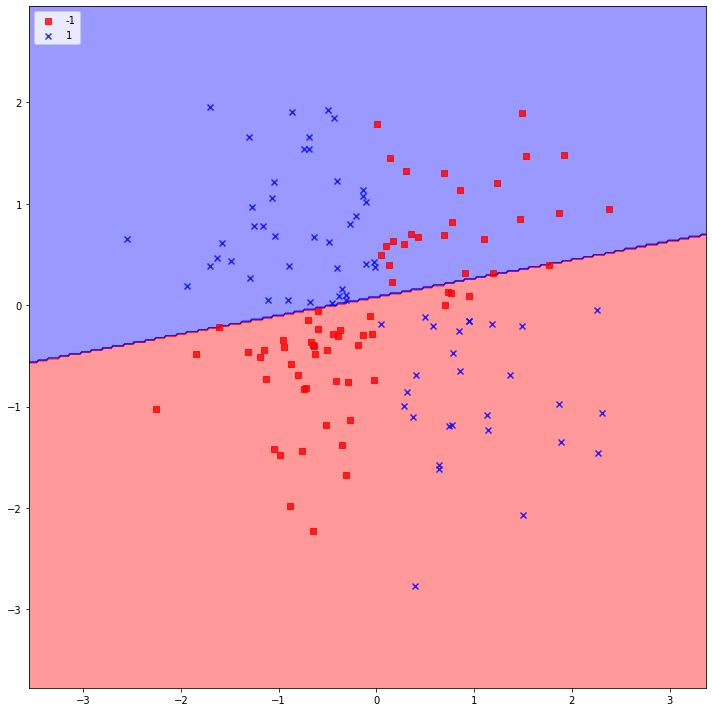

In [ ]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=1/10000, C=1)
# Train the classifier
svm.fit(X_train, y_train)

# Visualize the decision boundaries
fig = plt.figure(figsize=(10,10))
plot_decision_regions(X_train, y_train, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
print("Train Accuracy is:")
predictedtrain = svm.predict(X_train)
print(svm.score(X_train,y_train))
print("Test Accuracy is:")
predicted = svm.predict(X_test)
print(svm.score(X_test,y_test))

Train Accuracy is:
0.6142857142857143
Test Accuracy is:
0.55


In [ ]:
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[17 12]
 [15 16]]
              precision    recall  f1-score   support

          -1       0.53      0.59      0.56        29
           1       0.57      0.52      0.54        31

    accuracy                           0.55        60
   macro avg       0.55      0.55      0.55        60
weighted avg       0.55      0.55      0.55        60



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


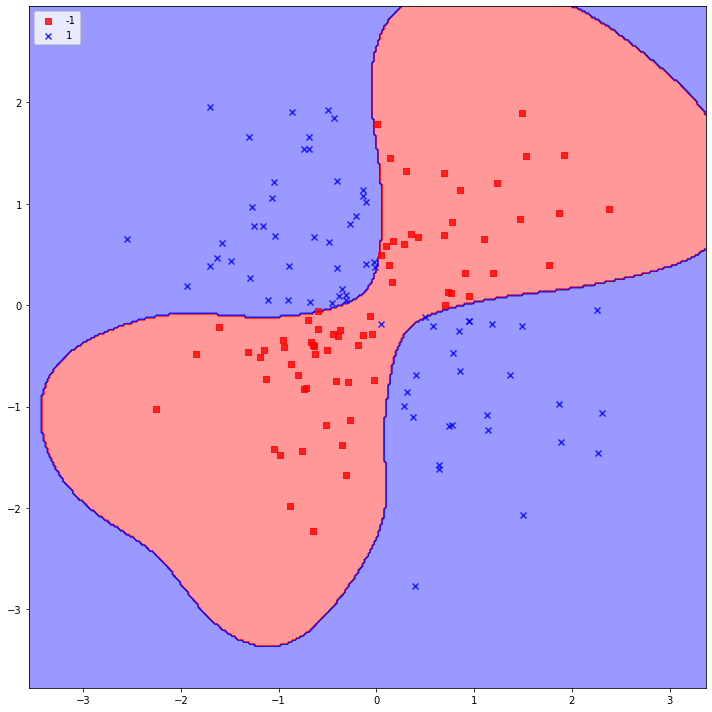

In [ ]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=1, C=1)
# Train the classifier
svm.fit(X_train, y_train)

# Visualize the decision boundaries
fig = plt.figure(figsize=(10,10))
plot_decision_regions(X_train, y_train, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
print("Train Accuracy is:")
predictedtrain = svm.predict(X_train)
print(svm.score(X_train,y_train))
print("Test Accuracy is:")
predicted = svm.predict(X_test)
print(svm.score(X_test,y_test))

Train Accuracy is:
0.9785714285714285
Test Accuracy is:
0.9166666666666666


In [ ]:
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[29  0]
 [ 5 26]]
              precision    recall  f1-score   support

          -1       0.85      1.00      0.92        29
           1       1.00      0.84      0.91        31

    accuracy                           0.92        60
   macro avg       0.93      0.92      0.92        60
weighted avg       0.93      0.92      0.92        60



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


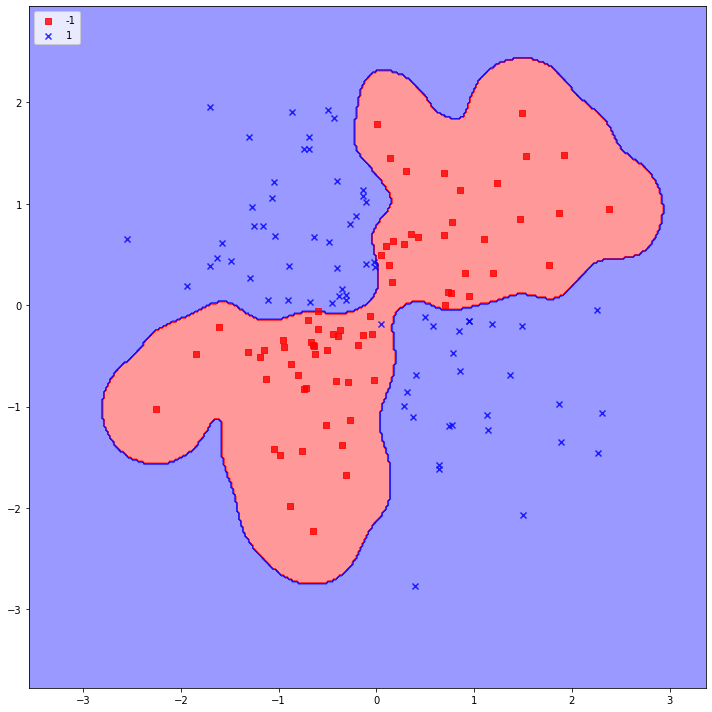

In [ ]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=10, C=1)
# Train the classifier
svm.fit(X_train, y_train)

# Visualize the decision boundaries
fig = plt.figure(figsize=(10,10))
plot_decision_regions(X_train, y_train, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
print("Train Accuracy is:")
predictedtrain = svm.predict(X_train)
print(svm.score(X_train,y_train))
print("Test Accuracy is:")
predicted = svm.predict(X_test)
print(svm.score(X_test,y_test))

Train Accuracy is:
0.9857142857142858
Test Accuracy is:
0.9166666666666666


In [ ]:
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[28  1]
 [ 4 27]]
              precision    recall  f1-score   support

          -1       0.88      0.97      0.92        29
           1       0.96      0.87      0.92        31

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



The gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. In other words, with low gamma, points far away from plausible seperation line are considered in calculation for the seperation line. Where as high gamma means the points close to plausible line are considered in calculation. This is very clearly visible in the graphs

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


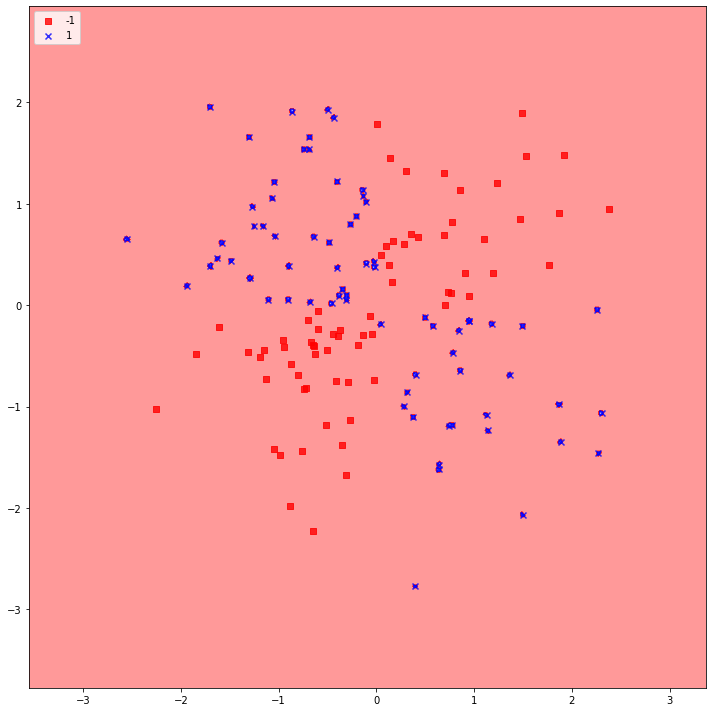

In [ ]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=10000, C=1)
# Train the classifier
svm.fit(X_train, y_train)

# Visualize the decision boundaries
fig = plt.figure(figsize=(10,10))
plot_decision_regions(X_train, y_train, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
print("Train Accuracy is:")
predictedtrain = svm.predict(X_train)
print(svm.score(X_train,y_train))
print("Test Accuracy is:")
predicted = svm.predict(X_test)
print(svm.score(X_test,y_test))

Train Accuracy is:
1.0
Test Accuracy is:
0.55


In [ ]:
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[29  0]
 [27  4]]
              precision    recall  f1-score   support

          -1       0.52      1.00      0.68        29
           1       1.00      0.13      0.23        31

    accuracy                           0.55        60
   macro avg       0.76      0.56      0.46        60
weighted avg       0.77      0.55      0.45        60



# **upto**

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

@interact(x=[1, 10, 1000, 10000, 100000])
def svc(x=1):
  # Create a SVC classifier using an RBF kernel
  svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=x)
  # Train the classifier
  svm.fit(X_train, y_train)

  # Visualize the decision boundaries
  fig = plt.figure(figsize=(10,10))
  plot_decision_regions(X_xor, y_xor, classifier=svm)
  plt.legend(loc='upper left')
  plt.tight_layout()
  plt.show()

interactive(children=(Dropdown(description='x', options=(1, 10, 1000, 10000, 100000), value=1), Output()), _do…

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


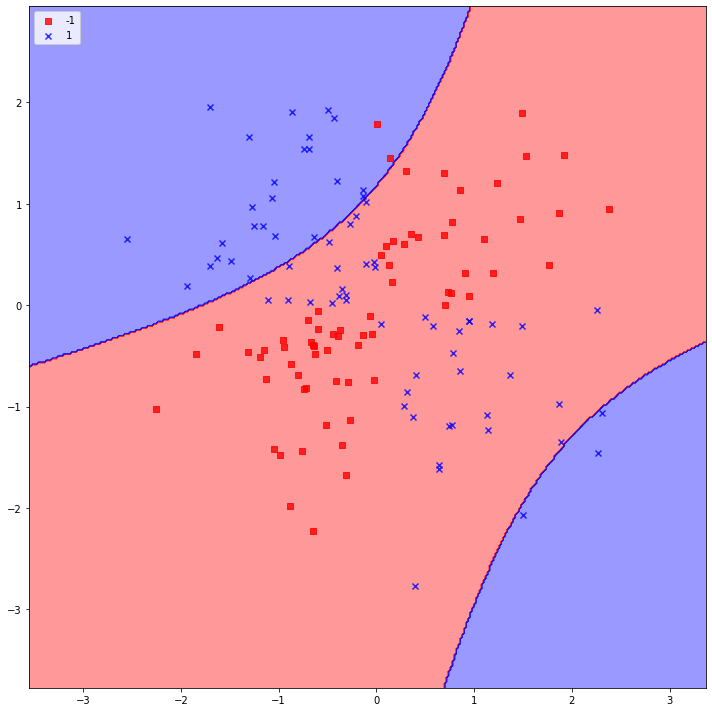

In [ ]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=10)
# Train the classifier
svm.fit(X_train, y_train)

# Visualize the decision boundaries
fig = plt.figure(figsize=(10,10))
plot_decision_regions(X_train, y_train, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
print("Train Accuracy is:")
predictedtrain = svm.predict(X_train)
print(svm.score(X_train,y_train))
print("Test Accuracy is:")
predicted = svm.predict(X_test)
print(svm.score(X_test,y_test))

Train Accuracy is:
0.6857142857142857
Test Accuracy is:
0.6666666666666666


In [ ]:
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[29  0]
 [20 11]]
              precision    recall  f1-score   support

          -1       0.59      1.00      0.74        29
           1       1.00      0.35      0.52        31

    accuracy                           0.67        60
   macro avg       0.80      0.68      0.63        60
weighted avg       0.80      0.67      0.63        60



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


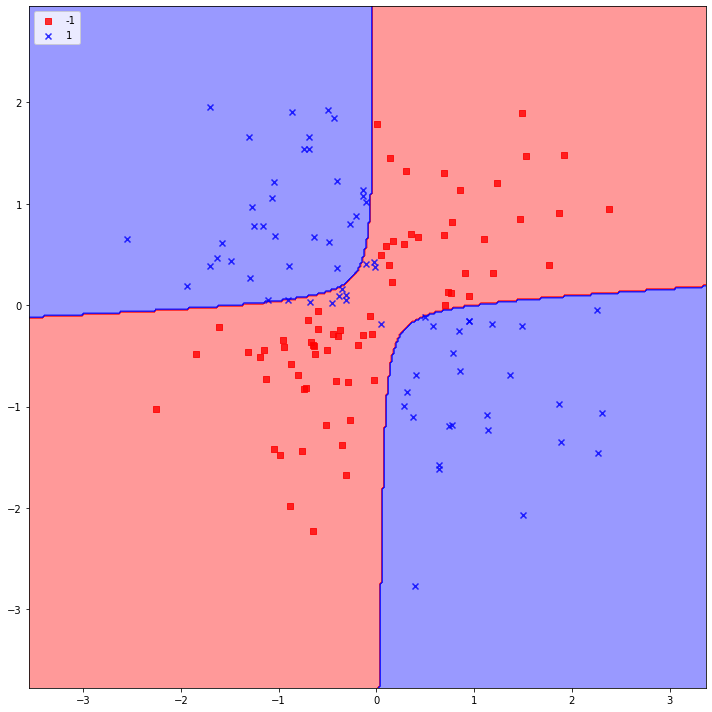

In [ ]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=1000)
# Train the classifier
svm.fit(X_train, y_train)

# Visualize the decision boundaries
fig = plt.figure(figsize=(10,10))
plot_decision_regions(X_train, y_train, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
print("Train Accuracy is:")
predictedtrain = svm.predict(X_train)
print(svm.score(X_train,y_train))
print("Test Accuracy is:")
predicted = svm.predict(X_test)
print(svm.score(X_test,y_test))

Train Accuracy is:
0.9214285714285714
Test Accuracy is:
0.9


In [ ]:
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[29  0]
 [ 6 25]]
              precision    recall  f1-score   support

          -1       0.83      1.00      0.91        29
           1       1.00      0.81      0.89        31

    accuracy                           0.90        60
   macro avg       0.91      0.90      0.90        60
weighted avg       0.92      0.90      0.90        60



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


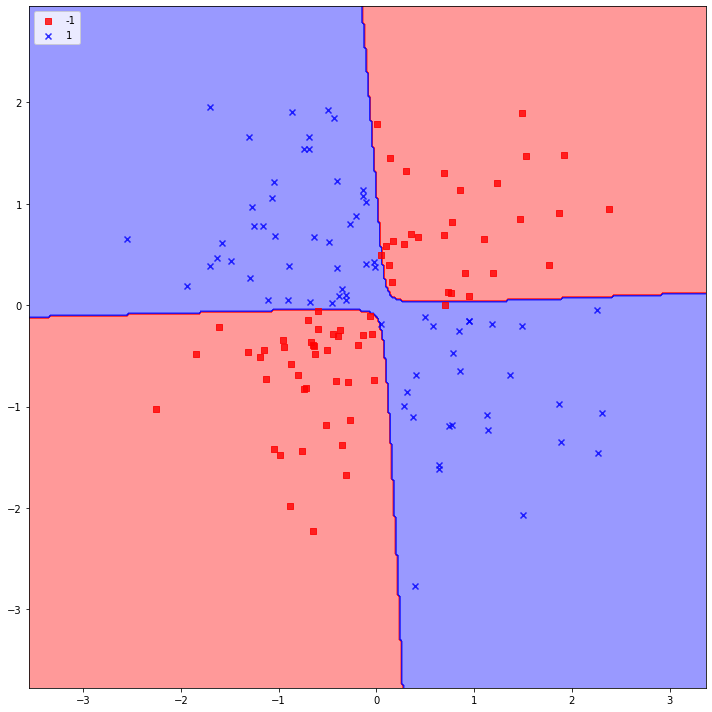

In [ ]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=2000)
# Train the classifier
svm.fit(X_train, y_train)

# Visualize the decision boundaries
fig = plt.figure(figsize=(10,10))
plot_decision_regions(X_train, y_train, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
print("Train Accuracy is:")
predictedtrain = svm.predict(X_train)
print(svm.score(X_train,y_train))
print("Test Accuracy is:")
predicted = svm.predict(X_test)
print(svm.score(X_test,y_test))

Train Accuracy is:
0.9857142857142858
Test Accuracy is:
0.9666666666666667


In [ ]:
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[28  1]
 [ 1 30]]
              precision    recall  f1-score   support

          -1       0.97      0.97      0.97        29
           1       0.97      0.97      0.97        31

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


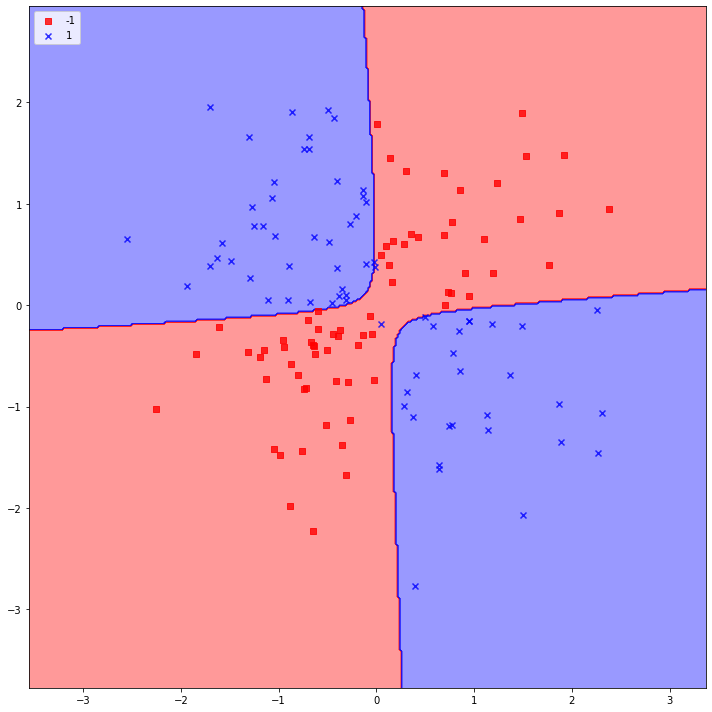

In [ ]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=10000)
# Train the classifier
svm.fit(X_train, y_train)

# Visualize the decision boundaries
fig = plt.figure(figsize=(10,10))
plot_decision_regions(X_train, y_train, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
print("Train Accuracy is:")
predictedtrain = svm.predict(X_train)
print(svm.score(X_train,y_train))
print("Test Accuracy is:")
predicted = svm.predict(X_test)
print(svm.score(X_test,y_test))

Train Accuracy is:
0.9857142857142858
Test Accuracy is:
0.9166666666666666


In [ ]:
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[29  0]
 [ 5 26]]
              precision    recall  f1-score   support

          -1       0.85      1.00      0.92        29
           1       1.00      0.84      0.91        31

    accuracy                           0.92        60
   macro avg       0.93      0.92      0.92        60
weighted avg       0.93      0.92      0.92        60



We saw that after furthur increasing C the test accuracy reduced. The reason being that C is penalty parameter the larger C means we want to class larger number of train points correctly and hence we will have a smaller margin which leads to misclassification of newly seen data since the margin was low. Which can be basically called as overfitting.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


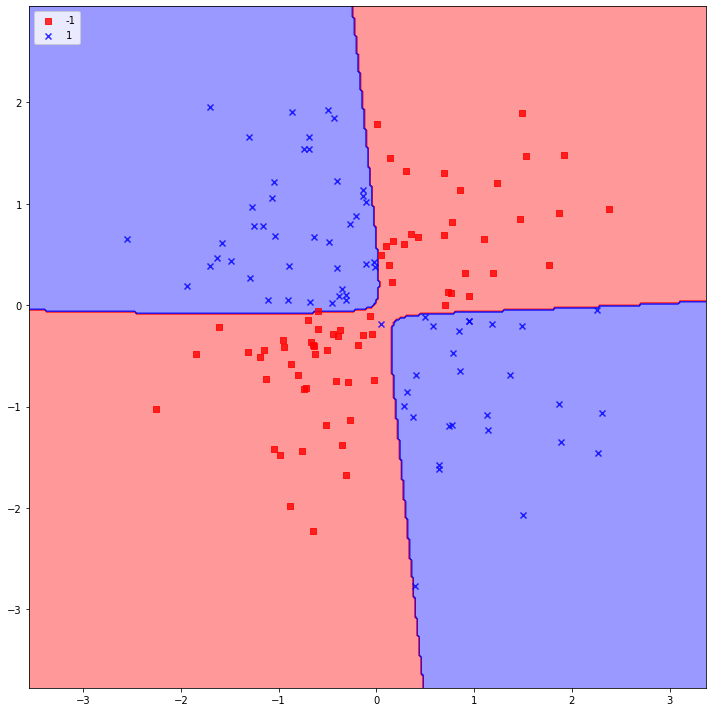

In [ ]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=100000)
# Train the classifier
svm.fit(X_train, y_train)

# Visualize the decision boundaries
fig = plt.figure(figsize=(10,10))
plot_decision_regions(X_train, y_train, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
print("Train Accuracy is:")
predictedtrain = svm.predict(X_train)
print(svm.score(X_train,y_train))
print("Test Accuracy is:")
predicted = svm.predict(X_test)
print(svm.score(X_test,y_test))

Train Accuracy is:
0.9857142857142858
Test Accuracy is:
0.9166666666666666


In [ ]:
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[29  0]
 [ 5 26]]
              precision    recall  f1-score   support

          -1       0.85      1.00      0.92        29
           1       1.00      0.84      0.91        31

    accuracy                           0.92        60
   macro avg       0.93      0.92      0.92        60
weighted avg       0.93      0.92      0.92        60



Grid Search

In [ ]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 10, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [0.01, 0.001, 0.0001],
                     'C': [1, 10, 100, 1000,2000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.4s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=4, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000, 2000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [ ]:
model_cv.best_params_

{'C': 2000, 'gamma': 0.01}

In [ ]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel= 'rbf', random_state=0, gamma=0.01, C=2000)
# Train the classifier
svm.fit(X_train, y_train)

SVC(C=2000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
print("Train Accuracy is:")
predictedtrain = svm.predict(X_train)
print(svm.score(X_train,y_train))
print("Test Accuracy is:")
predicted = svm.predict(X_test)
print(svm.score(X_test,y_test))

Train Accuracy is:
0.9857142857142858
Test Accuracy is:
0.9666666666666667
